# Data Investigation
Investigating the Land Use in England 2018 data.<br>
Connecting to the MongoDB database

In [1]:
#Import statements
import pandas as pd
from pymongo import MongoClient

In [2]:
#Set up connection
MONGO_CONNECTION_STRING = f"mongodb://localhost:27017/"
print(f"MONGO_CONNECTION_STRING = {MONGO_CONNECTION_STRING}")

DB_NAME="land_use_db"
print(f"DB_NAME = {DB_NAME}")


MONGO_CONNECTION_STRING = mongodb://localhost:27017/
DB_NAME = land_use_db


In [3]:
#Connect to MongoDB database
mongo_client=MongoClient(MONGO_CONNECTION_STRING)

In [4]:
mongo_db=mongo_client[DB_NAME]
land_use_collection=mongo_db['land_use_collection']

## What stories might the dataset contain?

Land use patterns: The dataset contains information on the types and amounts of land use in various regions, which could be analyzed to understand patterns of development, agriculture, recreation, and other uses. This could provide insights into trends in urbanization, environmental impacts of development, and other issues.<br>

Economic activity: The dataset includes information on the use of different types of buildings, which could be used to gain insights into economic activity in different regions. For example, higher levels of commercial or industrial development could indicate stronger local economies, while greater amounts of residential development might suggest population growth.This would require this data to be used in conjunction with another data set with more economic information

Regional differences: By analyzing the data across different regions, it may be possible to identify regional differences in land use patterns and economic activity. This could help inform policy decisions related to development, environmental conservation, and other issues.


# Main Features


## View all the documents in the land_use_collection

In [5]:
cursor = land_use_collection.find()

# Loop through the cursor and print each document
for document in cursor:
    print(document)

{'_id': ObjectId('640a3a01d412297ff41733dc'), 'ONS Code': 'E07000223', 'localAuthorityName ': 'Adur', 'developedUseCommunityBuildings': 136.17448348355018, 'developedUseLeisureAndRecreationalBuildings': 0.2730773799001107, 'developedUseCommunityServiceTotal': 136.4475608634503, 'developedUseDefenceBuildingsTotal': 0.0, 'developedUseIndustry': 13.897323950300802, 'developedUseOffices': 3.5042245313996134, 'developedUseRetail': 9.32331082989911, 'developedUseStorageAndWarehousing': 9.498221311866995, 'developedUseIndustryAndCommerceTotal': 36.22308062346652, 'developedUseLandfillAndWasteDisposal': 0.0662221249999572, 'developedUseMineralsAndMining': 0.0, 'developedUseMineralsAndLandfillTotal': 0.0662221249999572, 'developedUseInstitutionalAndCommunalAccomodation': 1.5291201581501261, 'developedUseResidential': 183.1298831024703, 'developedUseResidentialTotal': 184.65900326062044, 'developedUseHighwaysAndRoadTransport': 303.3929653123276, 'developedUseTransportOther': 162.26572365668736, 

This code retrieves all documents from the MongoDB collection named "land_use_collection" using the find() method and stores them in a cursor object called cursor. Then, it loops through the cursor and prints each document using the print() function.

The output will be a series of documents printed to the console, where each document is printed on a separate line.

## Count the total number of documents in the collection 

In [6]:
land_use_collection.estimated_document_count()

326

This code uses the estimated_document_count() method of the land_use_collection object to return the estimated number of documents in the collection. The output/return value is an integer representing the count of documents in the collection.
This confirms that no data is missing from the cleaned excel file as the total number of documents is the same

## View a list of all field names in the collection

In [7]:
# Get the names of all fields in the collection
field_names = land_use_collection.find_one().keys()

# Print the field names
for name in field_names:
    print(name)


_id
ONS Code
localAuthorityName 
developedUseCommunityBuildings
developedUseLeisureAndRecreationalBuildings
developedUseCommunityServiceTotal
developedUseDefenceBuildingsTotal
developedUseIndustry
developedUseOffices
developedUseRetail
developedUseStorageAndWarehousing
developedUseIndustryAndCommerceTotal
developedUseLandfillAndWasteDisposal
developedUseMineralsAndMining
developedUseMineralsAndLandfillTotal
developedUseInstitutionalAndCommunalAccomodation
developedUseResidential
developedUseResidentialTotal
developedUseHighwaysAndRoadTransport
developedUseTransportOther
developedUseUtilities
developedUseTransportAndUtilitiesTotal
developedUseUnidentifiedBuilding
developedUseUnidentifiedManmadeSurfaceNotRoadside
developedUseUnidentifiedStructure
developedUseUnknown
devlopedUseUnknownUseTotal
developedUseTotal
nondevelopedUseAgriculturalBuildings
nondevelopedUseAgriculturalLand
nondevelopedUseAgricultureTotal
nondevelopedUseForestryAndWoodland
nondevelopedUseNaturalLand
nondevelopedUseRo

This code retrieves a single document from the collection using find_one() and then uses the keys() method to obtain a list of all the field names in that document. The field names are then printed using a loop.

## Find the number of missing values in the collection

In [8]:
missing_count = land_use_collection.count_documents({"developedUseRetail": {"$exists": False}})
print("Number of documents with missing values in specified field:", missing_count)


Number of documents with missing values in specified field: 0


This code uses a query with the $exists operator to match documents where the "developedUseRetail" field does not exist. The count_documents method is then used to count the number of matching documents. The query can be modified to target other fields as needed.

# Plots

## Scatter plot exploring the relationship developed use Residential and Non-Developed use natural land 

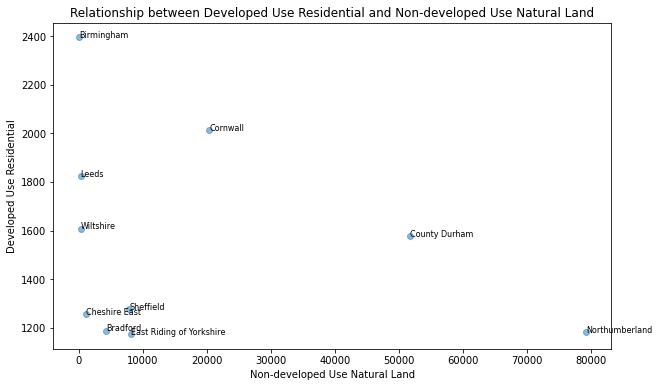

In [9]:
import matplotlib.pyplot as plt

# Get top 10 local authorities with highest developedUseResidential values
pipeline = [
    {"$match": {"Code": {"$ne": "K02000001"}}},  # Exclude England
    {"$project": {"localAuthorityName ": 1, "developedUseResidential": 1}},
    {"$sort": {"developedUseResidential": -1}},
    {"$limit": 10}
]
result = list(land_use_collection.aggregate(pipeline))
top_10_la = [doc["localAuthorityName "] for doc in result]

# Filter database to include only top 10 local authorities
pipeline = [
    {"$match": {"Code": {"$ne": "K02000001"}, "localAuthorityName ": {"$in": top_10_la}}},
    {"$project": {"_id": 0, "localAuthorityName ": 1, "developedUseResidential": 1, "nondevelopedUseNaturalLand": 1}}
]
df = pd.DataFrame(list(land_use_collection.aggregate(pipeline)))

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=df["nondevelopedUseNaturalLand"], y=df["developedUseResidential"], alpha=0.5)

# Add labels to dots
for i in range(len(df)):
    plt.text(df["nondevelopedUseNaturalLand"][i] + 5, df["developedUseResidential"][i], df["localAuthorityName "][i], fontsize=8)

plt.xlabel("Non-developed Use Natural Land")
plt.ylabel("Developed Use Residential")
plt.title("Relationship between Developed Use Residential and Non-developed Use Natural Land")
plt.show()


Based on the scatter plot, there appears to be a weak positive correlation between the developed use residential and non-developed use natural land values. However, the relationship is not very strong and there is a lot of variability in the data, with some local authorities having high levels of both developed residential use and non-developed natural land (such as Northumberland), and others having low levels of both. It's also worth noting that the correlation may be influenced by other factors such as geography, population density, and local zoning regulations.

The aim of this plot was to see if there was a relationship between areas with high residential development and natural land.

## A Scatter Plot showing the relationship between land used for Industry and land used for transport

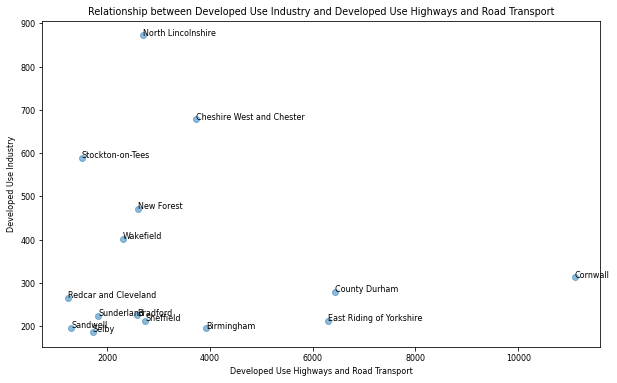

<Figure size 864x576 with 0 Axes>

In [39]:
# Get top 15 local authorities with highest developedUseIndustry values
pipeline = [
    {"$match": {"Code": {"$ne": "K02000001"}}},  # Exclude England
    {"$project": {"localAuthorityName ": 1, "developedUseIndustry": 1}},
    {"$sort": {"developedUseIndustry": -1}},
    {"$limit": 15}
]
result = list(land_use_collection.aggregate(pipeline))
top_15_la = [doc["localAuthorityName "] for doc in result]

# Filter database to include only top 15 local authorities
pipeline = [
    {"$match": {"Code": {"$ne": "K02000001"}, "localAuthorityName ": {"$in": top_15_la}}},
    {"$project": {"_id": 0, "localAuthorityName ": 1, "developedUseIndustry": 1, "developedUseHighwaysAndRoadTransport": 1}}
]
df = pd.DataFrame(list(land_use_collection.aggregate(pipeline)))

# Create scatter plot with text labels
plt.figure(figsize=(10, 6))
plt.scatter(x=df["developedUseHighwaysAndRoadTransport"], y=df["developedUseIndustry"], alpha=0.5)
for i, row in df.iterrows():
    plt.text(row["developedUseHighwaysAndRoadTransport"] + 0.5, row["developedUseIndustry"] + 0.5, row["localAuthorityName "])
plt.xlabel("Developed Use Highways and Road Transport")
plt.ylabel("Developed Use Industry")
plt.title("Relationship between Developed Use Industry and Developed Use Highways and Road Transport")


plt.rcParams.update({'font.size': 7})  # set font size for labels
plt.figure(figsize=(12, 8))  # set size of figure

plt.show()


This graph aims to show the relationship between the amount of land in a local authority that is used for industrial purposes (y-axis) and the amount of land used for highways and road transport (x-axis) in the top 15 local authorities with the highest industrial land use. Each dot on the graph represents a local authority, and the position of the dot indicates the amount of land in that local authority that is used for both industrial and transport purposes. The scatter plot shows whether there is a correlation between these two types of land use. 

Based on the scatter plot, there appears to be a weak positive relationship between the variables "Developed Use Industry" and "Developed Use Highways and Road Transport". This relationship can be seen in the general trend of the points going up and to the right,although there is still a fair amount of variability in the data.

My thought process for wanting to investigate this relationship was to test whether Local authorities with high levels of industry development require good access to highways and road transport for the transportation of goods and services.


- I kept getting a key error on "localAuthorityName" and could not figure out why. Eventually I realised that there is an extra space after the e and was finally able to continue.

# Folium Map showing the level of Develop use Industry 

In [16]:
import folium

# Define the coordinates for the center of the map
center = [55.3781, -3.4360]

# Create the map object with the center coordinates and zoom level
m = folium.Map(location=center, zoom_start=6)

# Define the color scheme for the choropleth map
color_scheme = 'YlOrRd'

# Load the data
pipeline = [
    {"$match": {"ONS Code": {"$ne": "K02000001"}}},
    {"$project": {"ONS Code": 1, "localAuthorityName ": 1, "developedUseIndustry": 1}},
]
result = list(land_use_collection.aggregate(pipeline))
data = pd.DataFrame(result)

# Replace missing values with 0
data = data.fillna(0)

# Convert data types
data['ONS Code'] = data['ONS Code'].astype(str)

# Create the choropleth layer
choropleth = folium.Choropleth(
    geo_data='/home/jovyan/work/L4198682_2022J_TMA02/2022J_TMA02_data/LadBoundaries/Local_Authority_Districts_(December_2018)_Boundaries_UK_BUC.geojson',
    data=data,
    columns=['localAuthorityName ', 'developedUseIndustry'],
    key_on='feature.properties.lad18nm',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Developed Use Industry'
)

# Add the choropleth layer to the map
choropleth.add_to(m)

# Display the map
m


The color intensity of each area represents the level of developed use industry, with darker colors indicating higher levels. Looking at the map, it appears that the areas with the highest levels of developed use industry are located in and around major cities such as Birmingham, and Manchester.

What is also noticeable is that the higher values are located primarily along the coast. Historically, ports and coastal areas have been centers of industry due to their strategic location for trade and transportation, which could be why we are seeing these higher values.